In [9]:
import os
import os.path as osp
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 

In [2]:
BASE_PATH = osp.join("IJCNN_Experiments", "mnist-4-0-tr400")

In [56]:
r = pd.pivot_table(df[df["c "] == 1], values="test_acc ", index=df[df["c "] == 1].index, columns="poison_fraction ")
r.mean()

poison_fraction 
0.000000    0.542000
0.047619    0.568667
0.065421    0.534667
0.084668    0.539667
0.103139    0.560667
0.120879    0.539667
0.137931    0.547000
0.154334    0.560000
0.170124    0.545333
0.185336    0.553667
0.200000    0.539667
dtype: float64

In [66]:
sns.set(rc={"figure.figsize":(15, 10)})

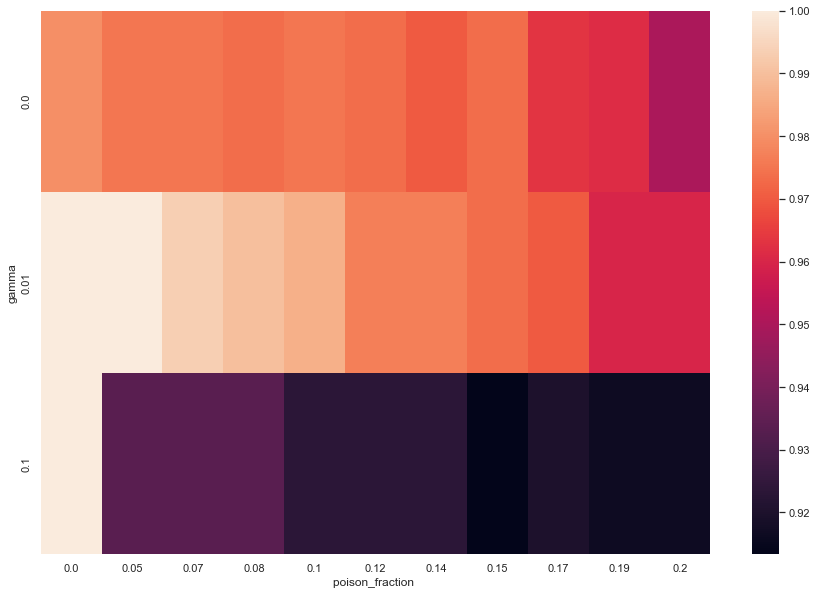

In [69]:
heatmap = sns.heatmap(pd.pivot_table(all_df[all_df["c "] == 1], 
                           values="test_acc ", 
                           index=all_df[all_df["c "] == 1]["gamma"], 
                           columns="poison_fraction "))
heatmap.figure.savefig("heatmap-svm-poly-c1.png")

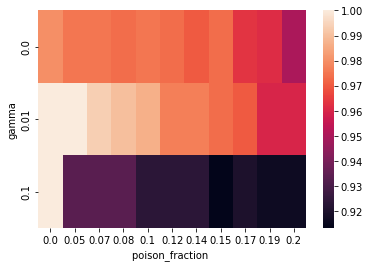

In [44]:
heatmap = sns.heatmap(pd.pivot_table(all_df[all_df["c "] == 100], 
                           values="test_acc ", 
                           index=all_df[all_df["c "] == 100]["gamma"], 
                           columns="poison_fraction "))
# heatmap.figure.savefig("heatmap-svm-poly-c1.png")

<AxesSubplot:xlabel='gamma', ylabel='poison_fraction '>

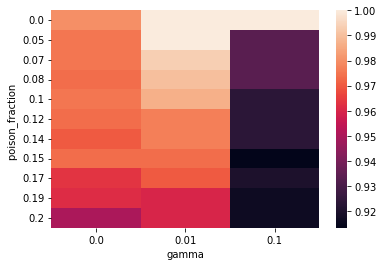

In [42]:
sns.heatmap(pd.pivot_table(all_df[all_df["c "] == 1], 
                           values="test_acc ", 
                           index="poison_fraction ", 
                           columns=all_df[all_df["c "] == 1]["gamma"]))

In [35]:
pd.pivot_table(all_df[all_df["c "] == 1], values="test_acc ", index=all_df[all_df["c "] == 1]["gamma"], columns="poison_fraction ")

poison_fraction,0.000000,0.047619,0.065421,0.084668,0.103139,0.120879,0.137931,0.154334,0.170124,0.185336,0.200000
gamma,,,,,,,,,,,
0.0001,0.966,0.962333,0.958000,0.956667,0.958333,0.953333,0.951000,0.957000,0.936667,0.932000,0.908333
0.0010,0.994,0.991000,0.990667,0.991000,0.991000,0.991000,0.991000,0.991000,0.990667,0.990333,0.990333
0.0100,0.997,0.996000,0.994333,0.990333,0.988000,0.977333,0.977333,0.975333,0.966333,0.959333,0.960667
0.1000,0.997,0.933333,0.932667,0.933333,0.925333,0.926667,0.922333,0.915000,0.919000,0.915667,0.920333


In [ ]:
pd.pivot_table(all_df[all_df["c "] == 1], values="test_acc ", index=all_df[all_df["c "] == 1]["gamma"], columns="poison_fraction ")

In [18]:
vertical_concat = pd.concat([df, df], axis=0)
vertical_concat

,algorithm,lb,tr_size,n_poison,poison_fraction,c,val_acc,test_acc,time,gamma
0,beta_poison_k15,1,400,0,0.000000,1,0.998,0.997,0.010027,1
1,beta_poison_k15,1,400,20,0.047619,1,0.899,0.925,6.540347,1
2,beta_poison_k15,1,400,28,0.065421,1,0.867,0.929,8.845791,1
3,beta_poison_k15,1,400,37,0.084668,1,0.901,0.936,7.398168,1
4,beta_poison_k15,1,400,46,0.103139,1,0.878,0.922,18.869518,1
...,...,...,...,...,...,...,...,...,...,...
61,beta_poison_k15,1,400,64,0.137931,100,0.893,0.923,30.245578,1
62,beta_poison_k15,1,400,73,0.154334,100,0.872,0.919,26.923292,1
63,beta_poison_k15,1,400,82,0.170124,100,0.875,0.911,39.295820,1
64,beta_poison_k15,1,400,91,0.185336,100,0.881,0.919,44.334339,1


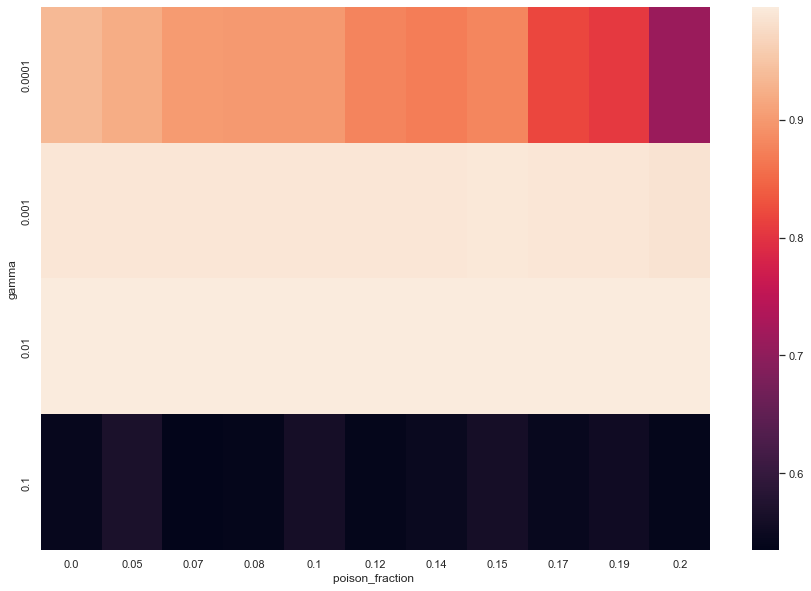

In [85]:
model = "svm-laplacian"
C = 1
path = osp.join(BASE_PATH, model)
all_df = pd.DataFrame()
for file_name in os.listdir(path):
    gamma = file_name.split("_")[-1].replace(".csv", "")
    df = pd.read_csv(osp.join(BASE_PATH, model, file_name))
    df["gamma"] = float(gamma)
    all_df = pd.concat([all_df, df], axis=0)
    
all_df["poison_fraction "] = all_df["poison_fraction "].round(2)
heatmap = sns.heatmap(pd.pivot_table(all_df[all_df["c "] == C], 
                           values="test_acc ", 
                           index=all_df[all_df["c "] == C]["gamma"], 
                           columns="poison_fraction "))
heatmap.figure.savefig(f"heatmap-{model}-c{C}.png")

In [80]:
all_df

,algorithm,lb,tr_size,n_poison,poison_fraction,c,val_acc,test_acc,time,gamma
0,beta_poison_k15,1,400,0,0.00,1,0.952,0.921,0.008017,0.0001
1,beta_poison_k15,1,400,20,0.05,1,0.948,0.913,8.748938,0.0001
2,beta_poison_k15,1,400,28,0.07,1,0.937,0.893,12.828699,0.0001
3,beta_poison_k15,1,400,37,0.08,1,0.926,0.882,9.009717,0.0001
4,beta_poison_k15,1,400,46,0.10,1,0.940,0.905,19.236310,0.0001
...,...,...,...,...,...,...,...,...,...,...
61,beta_poison_k15,1,400,64,0.14,100,0.971,0.959,24.940830,0.1000
62,beta_poison_k15,1,400,73,0.15,100,0.972,0.970,22.313839,0.1000
63,beta_poison_k15,1,400,82,0.17,100,0.974,0.958,30.889430,0.1000
64,beta_poison_k15,1,400,91,0.19,100,0.975,0.965,35.419918,0.1000


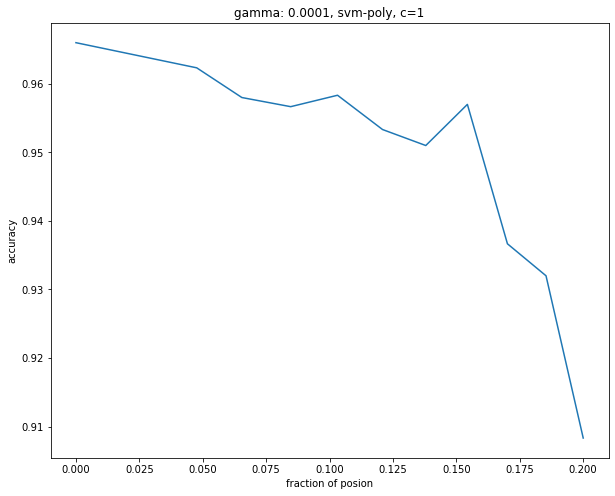

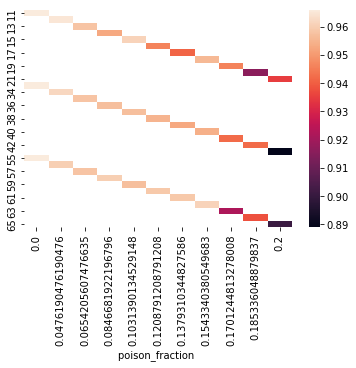

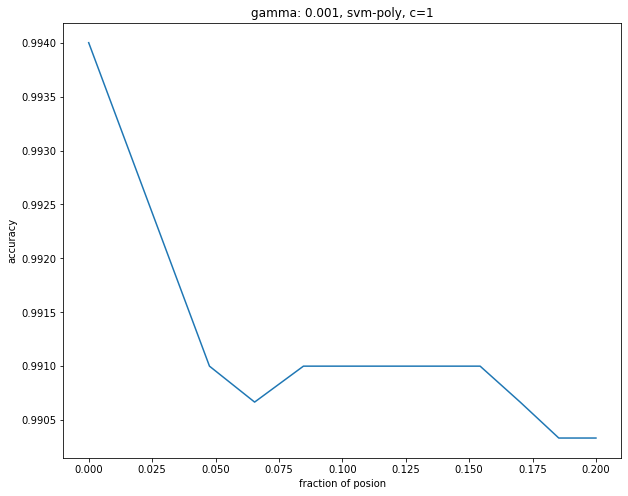

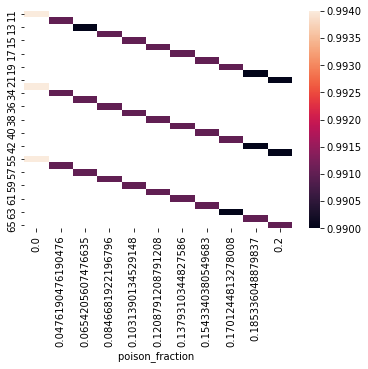

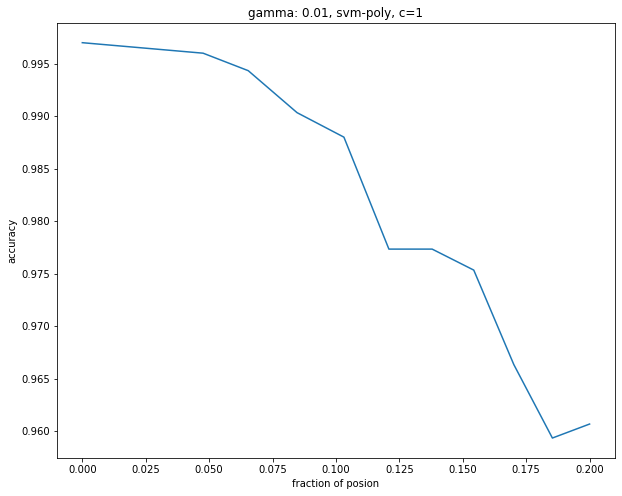

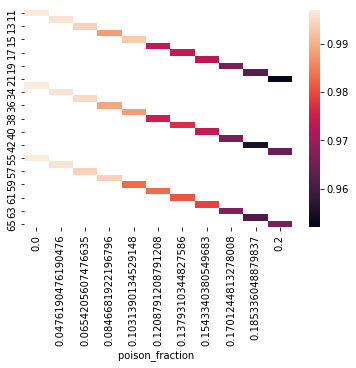

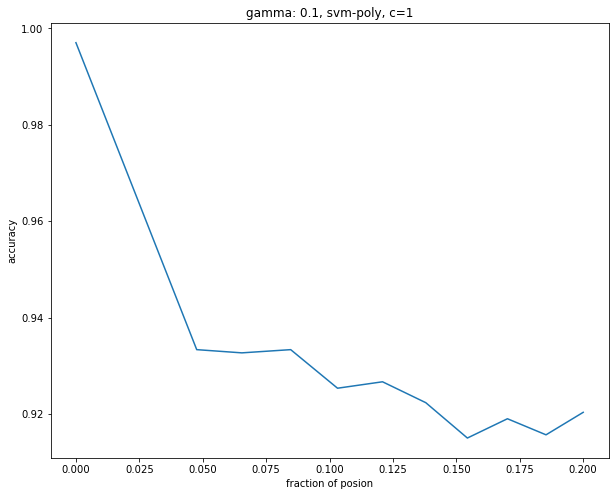

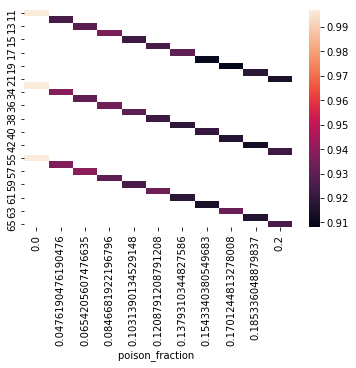

In [12]:
model = "svm-poly"
path = osp.join(BASE_PATH, model)
for file_name in os.listdir(path):
    gamma = file_name.split("_")[-1].replace(".csv", "")
    df = pd.read_csv(osp.join(BASE_PATH, model, file_name))
    r = pd.pivot_table(df[df["c "] == 1], values="test_acc ", index=df[df["c "] == 100].index, columns="poison_fraction ")
    plt.figure(figsize=(10,8))
    plt.xlabel("fraction of posion")
    plt.ylabel('accuracy')
    plt.title(f"gamma: {gamma}, svm-poly, c=1")
    plt.plot(r.mean().index, r.mean().to_numpy())
    plt.show()

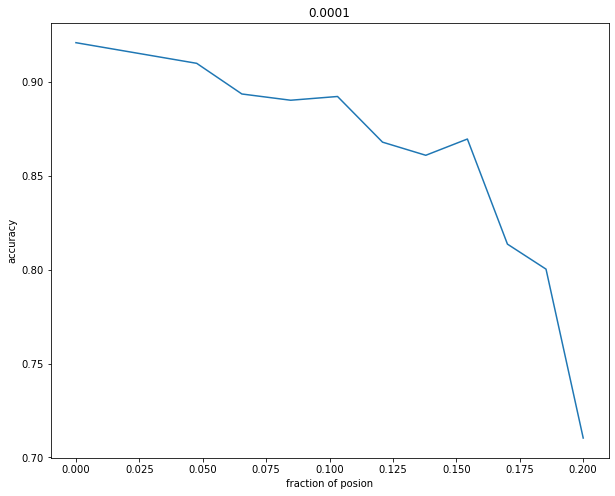

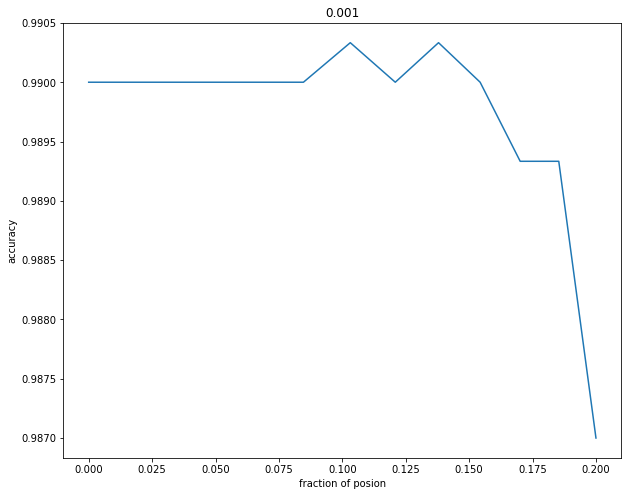

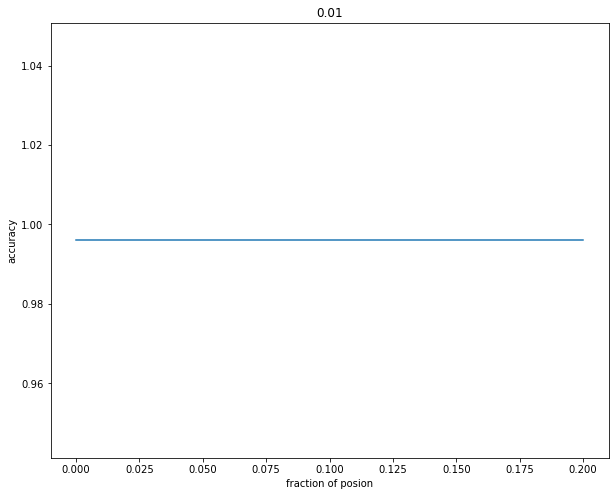

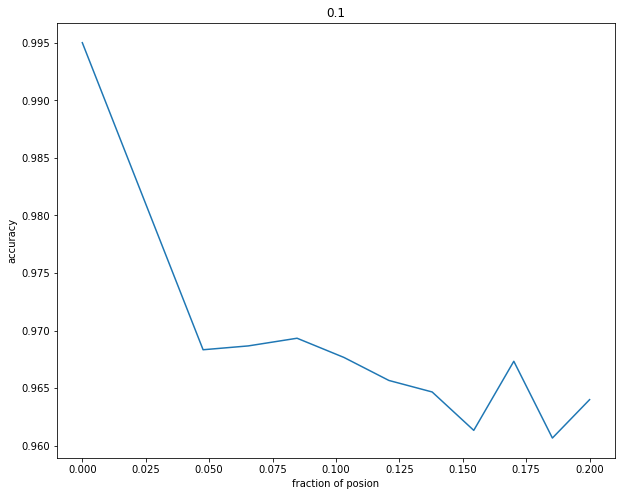

In [65]:
model = "svm-rbf"
path = osp.join(BASE_PATH, model)
for file_name in os.listdir(path):
    gamma = file_name.split("_")[-1].replace(".csv", "")
    df = pd.read_csv(osp.join(BASE_PATH, model, file_name))
    r = pd.pivot_table(df[df["c "] == 1], values="test_acc ", index=df[df["c "] == 1].index, columns="poison_fraction ")
    plt.figure(figsize=(10,8))
    plt.xlabel("fraction of posion")
    plt.ylabel('accuracy')
    plt.title(f"gamma: {gamma}, svm-rbf, c=1")
    plt.title(gamma)
    plt.plot(r.mean().index, r.mean().to_numpy())
    plt.show()

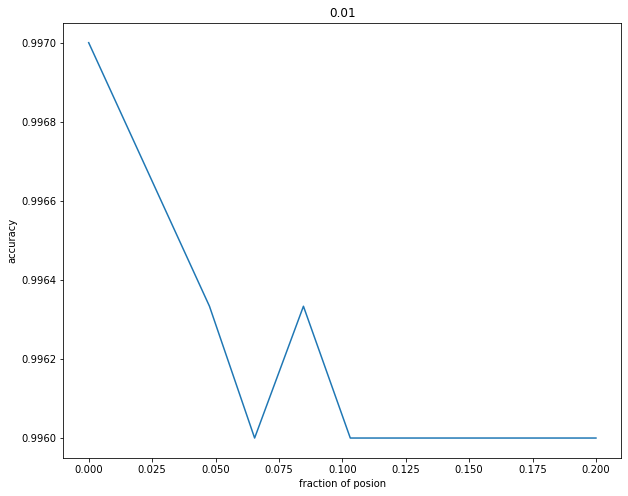

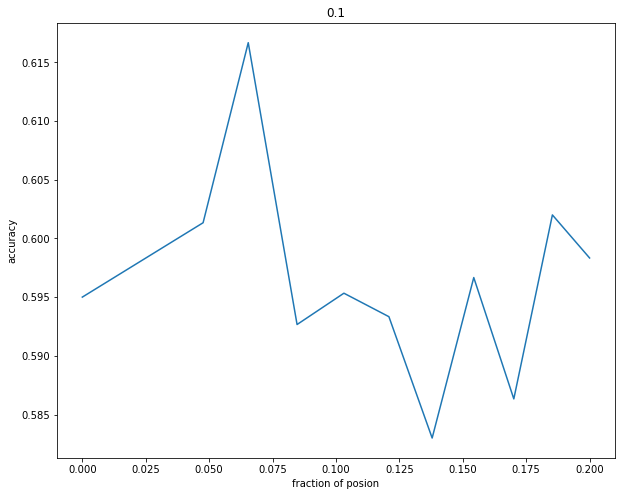

In [64]:
model = "svm-laplacian"
path = osp.join(BASE_PATH, model)
for file_name in os.listdir(path):
    gamma = file_name.split("_")[-1].replace(".csv", "")
    df = pd.read_csv(osp.join(BASE_PATH, model, file_name))
    r = pd.pivot_table(df[df["c "] == 100], values="test_acc ", index=df[df["c "] == 100].index, columns="poison_fraction ")
    plt.figure(figsize=(10,8))
    plt.xlabel("fraction of posion")
    plt.ylabel('accuracy')
    plt.title(f"gamma: {gamma}, svm-laplacian, c=100")
    plt.title(gamma)
    plt.plot(r.mean().index, r.mean().to_numpy())
    plt.show()